# Load the iris dataset
See http://scikit-learn.org/stable/tutorial/statistical_inference/supervised_learning.html

In [1]:
import numpy as np
from sklearn import datasets
iris = datasets.load_iris()
iris_X = iris.data
iris_y = iris.target
np.unique(iris_y)


array([0, 1, 2])

In [2]:
iris_X.shape

(150, 4)

# Train a nearest neighbors classifier

In [3]:
# Split iris data in train and test data
# A random permutation, to split the data randomly
np.random.seed(0)
indices = np.random.permutation(len(iris_X))
iris_X_train = iris_X[indices[:-10]]
iris_y_train = iris_y[indices[:-10]]
iris_X_test  = iris_X[indices[-10:]]
iris_y_test  = iris_y[indices[-10:]]
# Create and fit a nearest-neighbor classifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(iris_X_train, iris_y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [4]:
knn.predict(iris_X_test)

array([1, 2, 1, 0, 0, 0, 2, 1, 2, 0])

In [5]:
iris_y_test

array([1, 1, 1, 0, 0, 0, 2, 1, 2, 0])

# Load the diabetes dataset

In [6]:
diabetes = datasets.load_diabetes()
diabetes_X_train = diabetes.data[:-20]
diabetes_X_test  = diabetes.data[-20:]
diabetes_y_train = diabetes.target[:-20]
diabetes_y_test  = diabetes.target[-20:]
diabetes_X_train.shape

(422, 10)

# Train a linear regression model for the diabetes problem

In [7]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
regr.fit(diabetes_X_train, diabetes_y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [8]:
print(regr.coef_)

[ 3.03499549e-01 -2.37639315e+02  5.10530605e+02  3.27736980e+02
 -8.14131709e+02  4.92814588e+02  1.02848452e+02  1.84606489e+02
  7.43519617e+02  7.60951722e+01]


In [9]:
# The mean square error
np.mean((regr.predict(diabetes_X_test)-diabetes_y_test)**2)

2004.5676026898207

In [10]:
# Explained variance score: 1 is perfect prediction
# and 0 means that there is no linear relationship
# between X and y.
regr.score(diabetes_X_test, diabetes_y_test) 

0.5850753022690575

# Shrinkage of the linear model by ridge regression
This fights overfitting

Text(0, 0.5, 'Explained variance score')

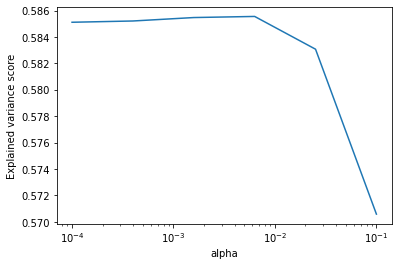

In [11]:
regr2 = linear_model.Ridge(alpha=.1)
alphas = np.logspace(-4, -1, 6)
from __future__ import print_function
myscores=[regr2.set_params(alpha=alpha).fit(diabetes_X_train, diabetes_y_train).score(diabetes_X_test, diabetes_y_test) for alpha in alphas]
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure()
plt.semilogx(alphas,myscores)
plt.xlabel('alpha')
plt.ylabel('Explained variance score')

# Shrinkage of the linear model by Lasso

In [12]:
regr3 = linear_model.Lasso()
scores = [regr3.set_params(alpha=alpha).fit(diabetes_X_train, diabetes_y_train).score(diabetes_X_test, diabetes_y_test) for alpha in alphas]
best_alpha = alphas[scores.index(max(scores))]
regr3.alpha = best_alpha
regr3.fit(diabetes_X_train, diabetes_y_train)
print(regr3.coef_)

[   0.         -212.43764548  517.19478111  313.77959962 -160.8303982
   -0.         -187.19554705   69.38229038  508.66011217   71.84239008]


In [13]:
regr3.score(diabetes_X_test, diabetes_y_test)

0.5887622418309262

# Train a logistic regression classifier for the iris problem

In [14]:
logistic = linear_model.LogisticRegression(C=1e5)
logistic.fit(iris_X_train, iris_y_train)

LogisticRegression(C=100000.0, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [15]:
logistic.predict(iris_X_test)

array([1, 2, 1, 0, 0, 0, 2, 1, 2, 0])

In [16]:
iris_y_test

array([1, 1, 1, 0, 0, 0, 2, 1, 2, 0])

# Train a Support Vector Machine classifier for the iris problem

In [17]:
from sklearn import svm
svc = svm.SVC(kernel='linear')
svc.fit(iris_X_train, iris_y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [18]:
svc.predict(iris_X_test)

array([1, 2, 1, 0, 0, 0, 2, 1, 2, 0])

In [19]:
iris_y_test

array([1, 1, 1, 0, 0, 0, 2, 1, 2, 0])